<a href="https://colab.research.google.com/github/abhishekmani12/dev_wizards_Hackathon/blob/main/rice%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS:**

In [6]:
import pandas as pd
import numpy as np
import sklearn
!pip install xgboost
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download mssmartypants/rice-type-classification

  0% 0.00/888k [00:00<?, ?B/s]
100% 888k/888k [00:00<00:00, 114MB/s]


In [5]:
from zipfile import ZipFile
zip = ZipFile('/content/rice-type-classification.zip')
zip.extractall()

In [83]:
df=pd.read_csv("/content/riceClassification.csv")

**EDA:**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [9]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [12]:
print(df.isnull().sum())

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


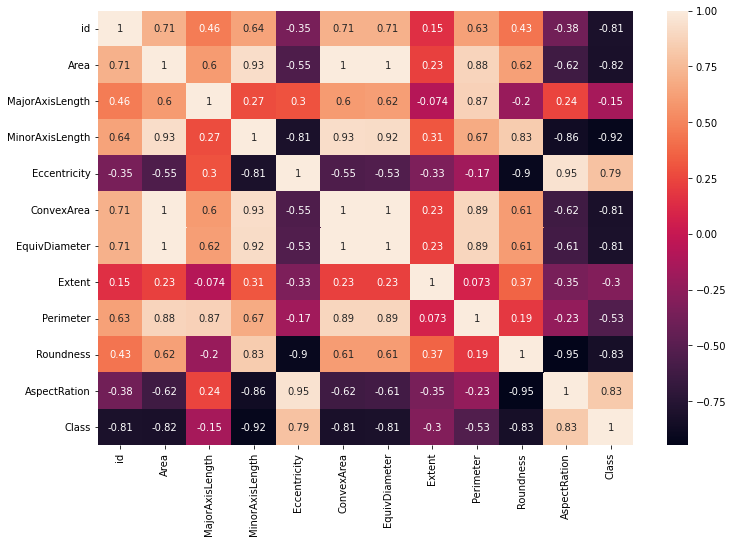

In [16]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [84]:
df=df.drop(["id"], axis=1)

In [46]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [18]:
print(sum(df["Class"])/len(df["Class"]))

0.5490789111905416


**SPLITTING DATASET:**

In [71]:
'''features=df.columns[:10]
print(features)

x1=df.loc[:,features]
y1=df.loc[:,['Class']]

print(x.shape,y.shape)

'''
x=df.drop(['Class'], axis=1)
y=df['Class']

print(x.shape, y.shape)


(18185, 10) (18185,)


In [72]:
print(x)

       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0      4537        92.229316        64.012769      0.719916        4677   
1      2872        74.691881        51.400454      0.725553        3015   
2      3048        76.293164        52.043491      0.731211        3132   
3      3073        77.033628        51.928487      0.738639        3157   
4      3693        85.124785        56.374021      0.749282        3802   
...     ...              ...              ...           ...         ...   
18180  5853       148.624571        51.029281      0.939210        6008   
18181  7585       169.593996        58.141659      0.939398        7806   
18182  6365       154.777085        52.908085      0.939760        6531   
18183  5960       151.397924        51.474600      0.940427        6189   
18184  6134       153.081981        51.590606      0.941500        6283   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
0          76.004525  0.657536

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, shuffle=True, test_size=0.2, random_state=42)

In [86]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(14548, 10) (14548,) (3637, 10) (3637,)


**SCALING:**

In [87]:
scaler=StandardScaler()
x_train_scaled=scaler.fit(x_train)

In [111]:
from pandas import DataFrame
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

In [112]:
x_train.shape, x_test.shape

((14548, 10), (3637, 10))

**METRICS DEFINITION:**

In [128]:
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, precision_recall_fscore_support

F1_score:

In [134]:
def recall(y_test, y_pred):
 return precision_recall_fscore_support(y_test, y_pred, average=None,labels=[0,1])

**LOGISTIC REGRESSION:**

In [113]:
from sklearn.linear_model import LogisticRegression
LogRegModel=LogisticRegression()
LogRegModel.fit(x_train, y_train.values.ravel())

LogisticRegression()

In [114]:
predLR=LogRegModel.predict(x_test)

ACCURACY:

In [115]:
accuracy_score(y_test, predLR)

0.9898267803134452

RECALL:

In [135]:
recall(y_test, predLR)

(array([0.991374  , 0.98857994]),
 array([0.98590686, 0.99301746]),
 array([0.98863287, 0.99079373]),
 array([1632, 2005]))

MSE:

In [136]:
mean_squared_error(y_test, predLR)

0.010173219686554854

**NAIVE BAYES:**

In [99]:
from sklearn.naive_bayes import GaussianNB
naiveModel=GaussianNB()
naiveModel.fit(x_train, y_train)

GaussianNB()

ACCURACY:

In [100]:
naiveModel.score(x_test, y_test)

0.9796535606268902

**XGBOOST:**

In [117]:
import xgboost as xg
xgb=xg.XGBClassifier()

eval_set=[(x_train,y_train),(x_test,y_test)]
eval_metric=["auc","error"]

In [118]:
xgb.fit(x_train, y_train.values.ravel(), eval_metric=eval_metric,eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.997199	validation_0-error:0.010861	validation_1-auc:0.994783	validation_1-error:0.012648
[1]	validation_0-auc:0.998045	validation_0-error:0.010654	validation_1-auc:0.996681	validation_1-error:0.012923
[2]	validation_0-auc:0.998102	validation_0-error:0.010517	validation_1-auc:0.996605	validation_1-error:0.012923
[3]	validation_0-auc:0.998056	validation_0-error:0.010517	validation_1-auc:0.996681	validation_1-error:0.012923
[4]	validation_0-auc:0.998243	validation_0-error:0.010311	validation_1-auc:0.996874	validation_1-error:0.012648
[5]	validation_0-auc:0.998242	validation_0-error:0.010517	validation_1-auc:0.996923	validation_1-error:0.012648
[6]	validation_0-auc:0.998389	validation_0-error:0.010517	validation_1-auc:0.996943	validation_1-error:0.012648
[7]	validation_0-auc:0.998393	validation_0-error:0.010311	validation_1-auc:0.997292	validation_1-error:0.012648
[8]	validation_0-auc:0.9984	validation_0-error:0.010311	validation_1-auc:0.997305	validation_1-error:0.0

XGBClassifier()

ACCURACY:

In [119]:
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))


0.9898267803134452


MSE:

In [137]:
mean_squared_error(y_test, predxgb)

0.010173219686554854

RECALL:

In [142]:
recall(y_test, predxgb)

(array([0.99076923, 0.98906561]),
 array([0.98651961, 0.9925187 ]),
 array([0.98863985, 0.99078915]),
 array([1632, 2005]))

**SVM:**

In [122]:
from sklearn import svm
svmModel=svm.SVC()
svmModel.fit(x_train, y_train)

SVC()

ACCURACY:

In [123]:
predSVM=svmModel.predict(x_test)
print(accuracy_score(y_test,predSVM))

0.9890019246631839


MSE:

In [138]:
mean_squared_error(y_test, predSVM)

0.010998075336816057

RECALL:

In [141]:
recall(y_test, predSVM)

(array([0.99075216, 0.98759305]),
 array([0.98468137, 0.9925187 ]),
 array([0.98770744, 0.99004975]),
 array([1632, 2005]))

**RANDOM FOREST:**

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFModel=RandomForestClassifier()

RFModel.fit(x_train, y_train)

RandomForestClassifier()

ACCURACY:

In [127]:
predRF=RFModel.predict(x_test)
print(accuracy_score(y_test,predRF))

0.9898267803134452


MSE:

In [139]:
mean_squared_error(y_test, predRF)

0.010173219686554854

RECALL:

In [140]:
recall(y_test, predRF)

(array([0.98956415, 0.99003984]),
 array([0.9877451, 0.9915212]),
 array([0.98865379, 0.99077997]),
 array([1632, 2005]))